In [11]:
import sys
sys.path.append('/Users/jiangxiaoyu/Desktop/All Projects/GPLVM_project_code/')
from util_functions import *
import time

## Approach 1

In [12]:
w_n_C_total = 50 # totally 700 points for C
w_n_outputs = 200 # 1500
start_time = time.time()
w_X_true, w_C_total, w_sample_total_data, kernel_parameters = tidily_sythetic_data_from_MOGP_smartly(n_C=w_n_C_total, n_X=w_n_outputs)
end_time = time.time()
print('Time for appraoch 1:', end_time - start_time)
shaped_data = w_sample_total_data.reshape(w_n_outputs, w_n_C_total)

covar_X has shape torch.Size([200, 200])
covar_C has shape torch.Size([50, 50])
Time for appraoch 1: 0.14235997200012207


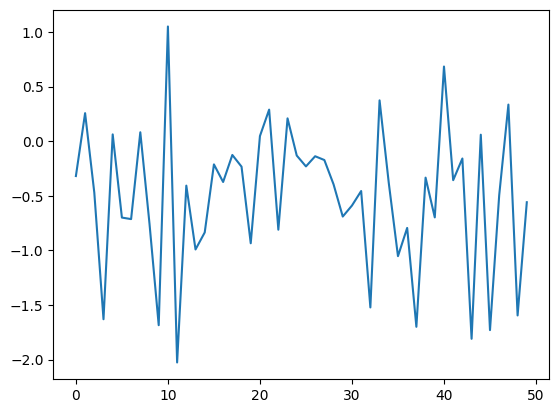

In [13]:
import matplotlib.pyplot as plt
plt.plot(shaped_data[40])

## Approach 2

In [14]:
start_time = time.time()
w_X_true, w_C_total, w_sample_total_data, kernel_parameters = tidily_sythetic_data_from_MOGP(n_C=w_n_C_total, n_X=w_n_outputs)
end_time = time.time()
print('Time for appraoch 2:', end_time - start_time)
shaped_data = w_sample_total_data.reshape(w_n_outputs, w_n_C_total)

covar_X has shape torch.Size([200, 200])
covar_C has shape torch.Size([50, 50])
covar_final has shape torch.Size([10000, 10000])
Dataset Generated!
Time for appraoch 2: 23.34930396080017


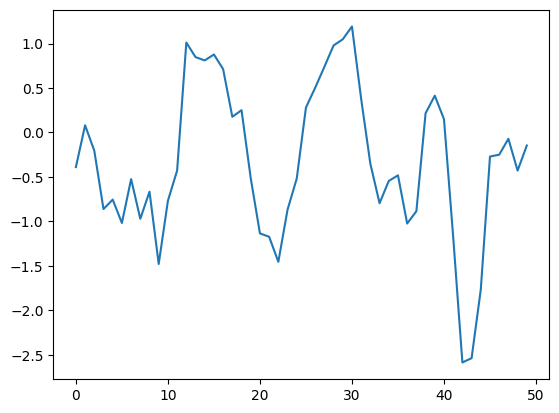

In [15]:
import matplotlib.pyplot as plt
plt.plot(shaped_data[40])